# NML'23 tutorial 4: Manipulating graphs with NetworkX


After getting familiarized with defining a graph object with NetworkX (from edges or features), in this session we will explore some of the most common network models, look at their basic properties and compare them.

## 1 Creating graphs using network models

In [1]:
%matplotlib inline
import collections

import numpy as np
from scipy import spatial
from matplotlib import pyplot as plt
import networkx as nx

Create an Erdős-Rényi graph with $N=100$ vertices, and a probability of connecting each pair of vertices equal to $p=0.15$.

In [51]:
N = 100  # number of nodes
p = 0.15  # probability of connection
er = nx.erdos_renyi_graph(N, p)

You can retrieve the adjacency matrix of the graph, from the `Graph` object `er` as follows:

In [52]:
er_adj = nx.adjacency_matrix(er, range(N))
er_adj = er_adj.todense()

You can now visualise the adjacency matrix:

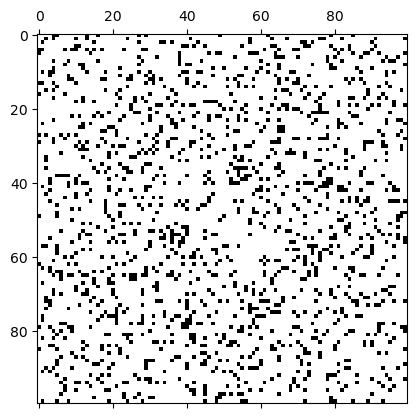

In [53]:
plt.spy(er_adj);

## 2 Plotting graphs

With NetworkX and Matplotlib we can also plot a graph. For example, we can plot the Erdős-Rényi graph that we created before as follows:

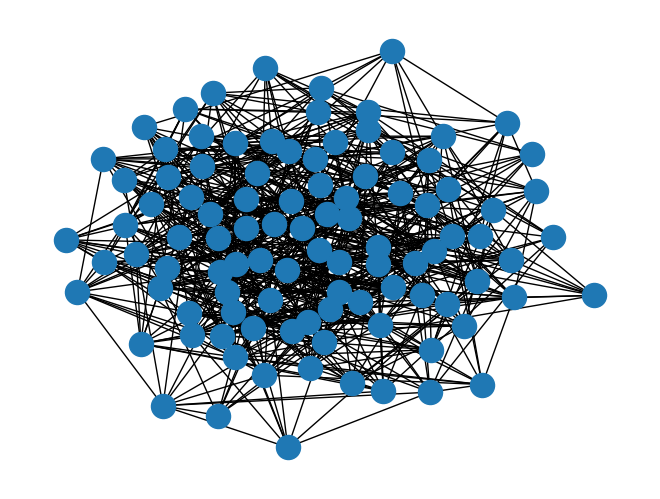

In [54]:
nx.draw(er)

### 2.1 Exercise

Create a Watts-Strogatz graph and plot it.

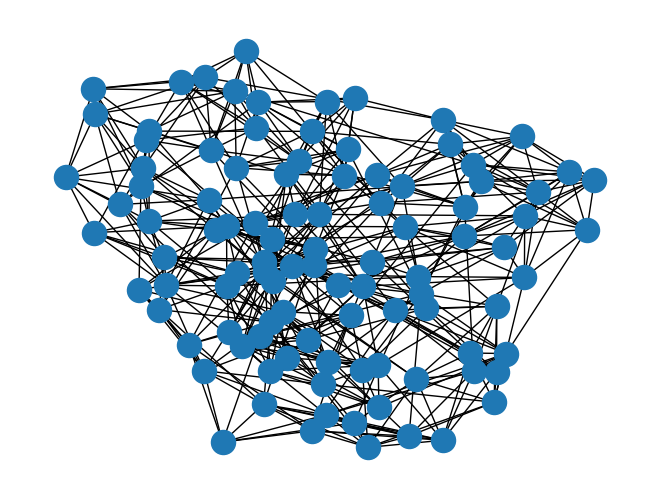

In [55]:
# Create a Watts-Strogartz graph.
# your code here
N = 100
p = 0.2
k = 10
ws = nx.watts_strogatz_graph(N, k, p)
nx.draw(ws)

## 3 Modifying graphs

It's easy to add or remove edges, but also nodes. If we add an edge between nodes that don't yet exist, they will be automatically created.

In [56]:
er.add_node(100)

In [57]:
er.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

Similarly, you can add and remove a collection of nodes or edges, and add and remove one node or edge:
* Adding nodes with:
    * `G.add_node`: One node at a time
    * `G.add_nodes_from`: A container of nodes
* Adding edges with:
    * `G.add_edge`: One edge at a time
    * `G.add_edges_from`: A container of edges
* Removing nodes with:
    * `G.remove_node`: One node at a time
    * `G.remove_nodes_from`: A container of nodes
* Removing edges with:
    * `G.remove_edge`: One edge at a time
    * `G.remove_edges_from`: A container of edges

You can get the number of edges with `G.size()`.

Add an edge between two non-existant vertices. Remove all nodes up to node 50. Draw the graph after each change.

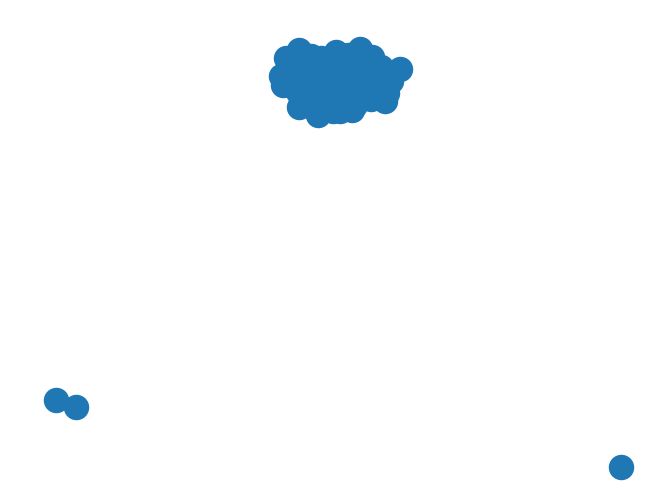

In [58]:
er.add_edge(101, 102)
nx.draw(er)

In [59]:
er.size()

727

NodeView((50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102))

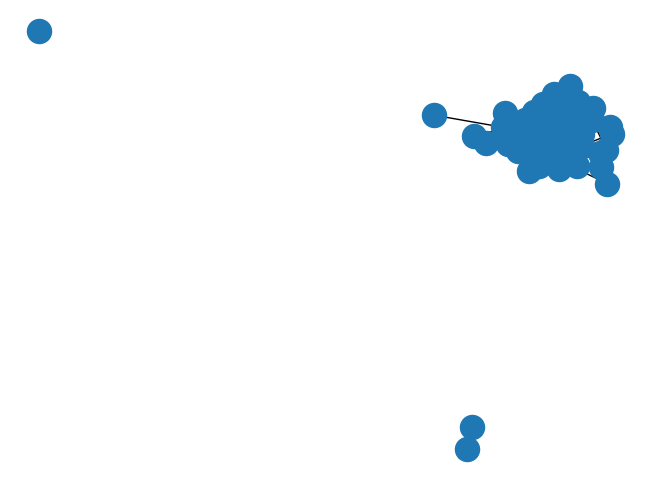

In [60]:
er.remove_nodes_from(range(50))
nx.draw(er)
er.nodes()

In [61]:
er.size() # returns number of edges

175

## 4 Degree distribution

`G.degree()` returns a ``DegreeView`` object with pairs of nodes and their degree.
If we specify a node, `G.degree(node)` will return the degree of that node.

Create an Erdős-Rényi network and plot a histogram of node degrees.  

In [62]:
N = 100  # number of nodes
p = 0.15  # probability of connection
er = nx.erdos_renyi_graph(N, p)

In [63]:
d = er.degree()
print(d)

[(0, 8), (1, 13), (2, 12), (3, 16), (4, 18), (5, 15), (6, 12), (7, 13), (8, 15), (9, 10), (10, 19), (11, 12), (12, 16), (13, 21), (14, 13), (15, 19), (16, 10), (17, 25), (18, 19), (19, 12), (20, 17), (21, 10), (22, 17), (23, 12), (24, 8), (25, 24), (26, 12), (27, 13), (28, 17), (29, 12), (30, 15), (31, 14), (32, 21), (33, 13), (34, 14), (35, 13), (36, 16), (37, 17), (38, 12), (39, 13), (40, 19), (41, 16), (42, 14), (43, 20), (44, 19), (45, 12), (46, 16), (47, 17), (48, 20), (49, 15), (50, 15), (51, 9), (52, 10), (53, 12), (54, 16), (55, 14), (56, 20), (57, 19), (58, 14), (59, 13), (60, 23), (61, 12), (62, 23), (63, 15), (64, 14), (65, 13), (66, 11), (67, 13), (68, 12), (69, 15), (70, 14), (71, 17), (72, 9), (73, 14), (74, 12), (75, 16), (76, 16), (77, 17), (78, 17), (79, 12), (80, 18), (81, 9), (82, 10), (83, 9), (84, 13), (85, 15), (86, 11), (87, 9), (88, 6), (89, 12), (90, 7), (91, 11), (92, 19), (93, 17), (94, 14), (95, 16), (96, 12), (97, 12), (98, 19), (99, 8)]


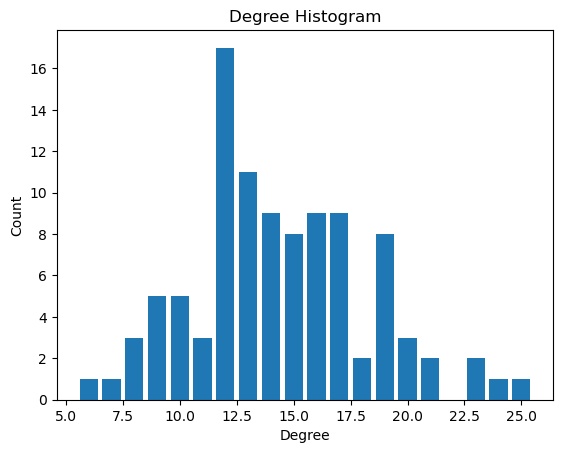

In [64]:
# Erdős-Rényi node degree histogram.
degree_sequence = sorted([d for _, d in er.degree()], reverse=True)  # degree sequence: creating a sorted list
degreeCount = collections.Counter(degree_sequence)
deg, count = zip(*degreeCount.items())

fig, ax = plt.subplots()
ax.bar(deg, count)
ax.set_title("Degree Histogram")
ax.set_ylabel("Count")
ax.set_xlabel("Degree");

### 4.1 Fitting a distribution

Try to fit a Poisson distribution.

In [65]:
# Poisson distribution.
def poisson(mu, k):
    return np.exp(-mu) * mu**k * (np.math.factorial(k)**-1)

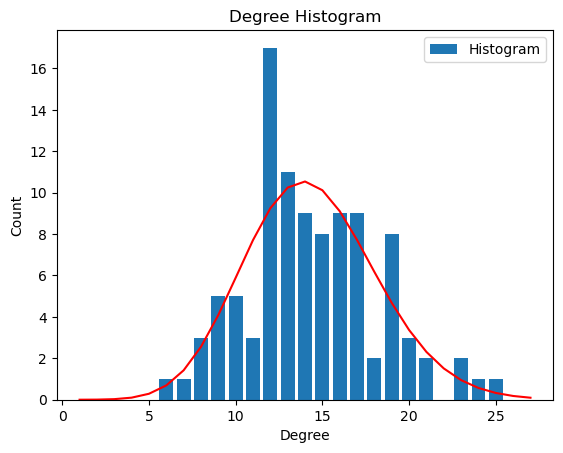

In [66]:
fig, ax = plt.subplots()
ax.bar(deg, count, label='Histogram')

# Poisson distribution
deg_range = np.arange(1,28)
mu = 2*er.size()/N
poiss = N*np.array([poisson(mu, k) for k in deg_range])
ax.plot(deg_range, poiss,'r')

ax.legend()
ax.set_title("Degree Histogram")
ax.set_ylabel("Count")
ax.set_xlabel("Degree");

In [67]:
print('average degree={}'.format(mu))

average degree=14.4


We observe that $ \langle k \rangle <\!\!< N $. Poisson distribution is a good approximation.  

Let's try with a higher probability of connection

In [68]:
N = 100  # number of nodes
p = 0.75  # probability of connection
er = nx.erdos_renyi_graph(N, p)
d = er.degree()
degree_sequence = sorted([d for n, d in er.degree()], reverse=True)  # degree sequence: creating a sorted list
degreeCount = collections.Counter(degree_sequence)
deg, count = zip(*degreeCount.items())

When the average degree increases and is no longer significantly smaller than the number of nodes the Poisson distribution is not a good fit.  

### 4.2 Exercise

Let's go back to the Watts-Strogatz network.

In [69]:
N=100
k = 10 # Regularity (number of nearest neighbors)
p = 0.2 # randomness (rewiring probabilty)
ws = nx.watts_strogatz_graph(N, k, p)

Calculate the averge distance $\langle d \rangle$ (average shortest path length) of the graph

In [72]:
# your code here
dAvg_small_world = nx.average_shortest_path_length(ws)

In [71]:
dAvg_small_world

2.4896969696969697

Now evaluate it through the small world property.  

In [75]:
# your code here
np.log(N)/np.log(2*ws.size()/N)

2.0

Plot the absolute error of the small world estimation of $\langle d \rangle$ with respect to randomness $p$

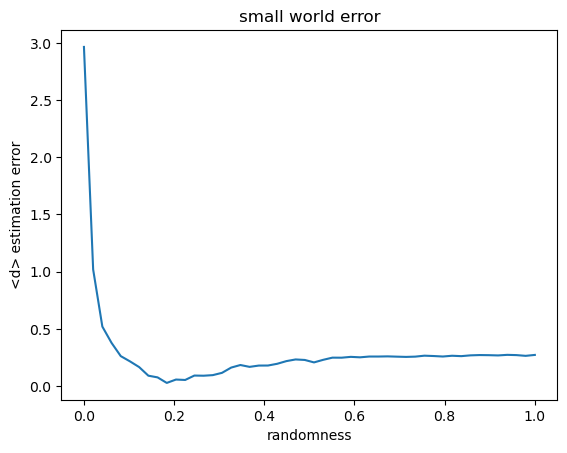

In [77]:
probs = np.linspace(0,1,50)
err = np.zeros(probs.shape)
for idx,p in enumerate(probs):
  ws = nx.watts_strogatz_graph(N, k, p)
  dAvg = nx.average_shortest_path_length(ws)
  err[idx] = np.abs(dAvg-dAvg_small_world)

fig, ax = plt.subplots()
ax.plot(probs, err, label='small world error')
ax.set_title("small world error")
ax.set_xlabel("randomness")
ax.set_ylabel("<d> estimation error");


Calculating the average clustering coefficient ($C$) of the WS graph with NetworkX:

In [82]:
N=100
k = 10 # Regularity (number of nearest neighbors)
p = 0.2 # randomness (rewiring probabilty)
ws = nx.watts_strogatz_graph(N, k, p)
C = nx.average_clustering(ws)
print(C)

0.4022912642912642


Estimating it using the random network model:

In [83]:
avg_degree = 2*ws.size()/N
C_est = avg_degree/N
print(C_est)

0.1


Try to gradually increase the number of nodes $N$ and notice what happens.   
**Answer**  
for random model, clustering coefficient is very sensitive to the number of nodes.